<a href="https://colab.research.google.com/github/namanverma4321/PortfolioProjects/blob/main/Captcha_Recognition_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing libraries
import numpy as np 

%matplotlib inline 

import matplotlib.pyplot as plt #for graphs
import os #for operating system dependent fucntionality
from keras import layers #for building layers of neural net
from keras.models import Model
from keras.models import load_model
from keras import callbacks #for training logs, saving to disk periodically
import cv2 #OpenCV(Open Source computer vision lib), containg CV algos
import string

In [3]:
#print images in dataset
os.listdir("/content/drive/MyDrive/captcha_dataset/samples")

['x362g.png',
 'wnmyn.png',
 'x44n4.png',
 'w2yp7.png',
 'x6pdb.png',
 'xfgxb.png',
 'y7d75.png',
 'xce8d.png',
 'y32yy.png',
 'xmcym.png',
 'y7x8p.png',
 'xxw44.png',
 'xw465.png',
 'y2436.png',
 'y866y.png',
 'y4ec2.png',
 'y4n6m.png',
 'xymfn.png',
 'y48c3.png',
 'xemyg.png',
 'y2xg4.png',
 'xdn65.png',
 'xc68n.png',
 'xcf88.png',
 'xf4p4.png',
 'y53c2.png',
 'xnnc3.png',
 'x8e8n.png',
 'ycmcw.png',
 'xbcbx.png',
 'xdcn4.png',
 'y5dpp.png',
 'y7mnm.png',
 'xnn4d.png',
 'xbem6.png',
 'ybfx6.png',
 'xfn6n.png',
 'xe6eb.png',
 'xyncc.png',
 'xwx7d.png',
 'y3c58.png',
 'xxbm5.png',
 'x8xnp.png',
 'y2ye8.png',
 'xnfx5.png',
 'xngxc.png',
 'xfg65.png',
 'xgcxy.png',
 'y33nm.png',
 'y5g87.png',
 'xnd3y.png',
 'xf5g7.png',
 'y5w28.png',
 'xxney.png',
 'ycnfc.png',
 '3p67n.png',
 'yge7c.jpg',
 'yd755.png',
 '63824.png',
 'ygenn.png',
 'ygfwe.png',
 '5p3mm.png',
 'yy824.png',
 'yx2d4.png',
 'ypw3d.png',
 'yf424.png',
 'ymp7g.png',
 'yxd7m.png',
 'yf347.png',
 '2xc2n.png',
 '43gey.png',
 '2g7n

In [4]:
#total no of images in dataset
n=len(os.listdir("/content/drive/My Drive/captcha_dataset/samples"))
n

1068

In [5]:
#defining size of image
imgshape=(50,200,1) #50-height, 200-width, 1-no of channels

In [6]:
character= string.ascii_lowercase + "0123456789" # All symbols captcha can contain
nchar = len(character) #total number of char possible
nchar

36

In [7]:
#preprocesss image
def preprocess():
  X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
  y = np.zeros((5,n,nchar)) #5*1070*36(5 letters in captcha) with all entries 0

  for i, pic in enumerate(os.listdir("/content/drive/My Drive/captcha_dataset/samples")):
  #i represents index no. of image in directory 
  #pic contains the file name of the particular image to be preprocessed at a time
    
    img = cv2.imread(os.path.join("/content/drive/My Drive/captcha_dataset/samples", pic), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
    pic_target = pic[:-4]#this drops the .png extension from file name and contains only the captcha for training
    
    if len(pic_target) < 6: #captcha is not more than 5 letters
      img = img / 255.0 #scales the image between 0 and 1
      img = np.reshape(img, (50, 200, 1)) #reshapes image to width 200 , height 50 ,channel 1 

      target=np.zeros((5,nchar)) #creates an array of size 5*36 with all entries 0

      for j, k in enumerate(pic_target):
      #j iterates from 0 to 4(5 letters in captcha)
      #k denotes the letter in captcha which is to be scanned
         index = character.find(k) #index stores the position of letter k of captcha in the character string
         target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

      X[i] = img #stores all the images
      y[:,i] = target #stores all the info about the letters in captcha of all images

  return X,y

In [8]:
#create model
def createmodel():
    img = layers.Input(shape=imgshape) # Get image as an input of size 50,200,1
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) #50*200
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 25*100
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 13*50
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) #to improve the stability of model
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 7*25
    
    flat = layers.Flatten()(mp3) #convert the layer into 1-D

    outs = []
    for _ in range(5): #for 5 letters of captcha
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) #drops 0.5 fraction of nodes
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) #result of layers
    
    # Compile model and return it
    model = Model(img, outs) #create model
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [9]:
#Create model
model=createmodel();
model.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 50, 200, 16)  160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 25, 100, 16)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 25, 100, 32)  4640        ['max_pooling2d[0][0]']      

In [10]:
X,y=preprocess()

In [11]:
#split the 1070 samples where 970 samples will be used for training purpose
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [12]:
#Applying the model
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=60, validation_split=0.2)
#batch size- 32 defines no. of samples per gradient update
#Validation split=0.2 splits the training set in 80-20% for training nd testing

Epoch 1/60
25/25 [==============================] - 10s 83ms/step - loss: 17.9019 - dense_1_loss: 3.4741 - dense_3_loss: 3.5992 - dense_5_loss: 3.5733 - dense_7_loss: 3.5656 - dense_9_loss: 3.6897 - dense_1_accuracy: 0.0709 - dense_3_accuracy: 0.0541 - dense_5_accuracy: 0.0670 - dense_7_accuracy: 0.0374 - dense_9_accuracy: 0.0554 - val_loss: 17.6937 - val_dense_1_loss: 3.6065 - val_dense_3_loss: 3.5192 - val_dense_5_loss: 3.5224 - val_dense_7_loss: 3.5175 - val_dense_9_loss: 3.5281 - val_dense_1_accuracy: 0.0000e+00 - val_dense_3_accuracy: 0.0258 - val_dense_5_accuracy: 0.1392 - val_dense_7_accuracy: 0.0464 - val_dense_9_accuracy: 0.0619
Epoch 2/60
25/25 [==============================] - 1s 26ms/step - loss: 16.7404 - dense_1_loss: 3.1462 - dense_3_loss: 3.3702 - dense_5_loss: 3.3678 - dense_7_loss: 3.3741 - dense_9_loss: 3.4821 - dense_1_accuracy: 0.1018 - dense_3_accuracy: 0.0670 - dense_5_accuracy: 0.0941 - dense_7_accuracy: 0.0644 - dense_9_accuracy: 0.0670 - val_loss: 17.5943 - v

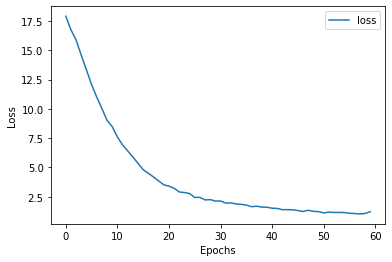

In [13]:
#graph of loss vs epochs
for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [14]:
#Loss on training set
#Finding Loss on training set
preds = model.evaluate(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]])
print ("Loss on training set= " + str(preds[0]))

31/31 [==============================] - 0s 8ms/step - loss: 1.4662 - dense_1_loss: 1.2213 - dense_3_loss: 0.0139 - dense_5_loss: 0.0711 - dense_7_loss: 0.0955 - dense_9_loss: 0.0644 - dense_1_accuracy: 0.8536 - dense_3_accuracy: 0.9938 - dense_5_accuracy: 0.9763 - dense_7_accuracy: 0.9773 - dense_9_accuracy: 0.9804
Loss on training set= 1.4662294387817383


In [15]:
#Finding loss on test set
preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print ("Loss on testing set= " + str(preds[0]))

4/4 [==============================] - 0s 7ms/step - loss: 3.0222 - dense_1_loss: 1.7197 - dense_3_loss: 0.2458 - dense_5_loss: 0.4311 - dense_7_loss: 0.3435 - dense_9_loss: 0.2821 - dense_1_accuracy: 0.8878 - dense_3_accuracy: 0.9490 - dense_5_accuracy: 0.8980 - dense_7_accuracy: 0.8980 - dense_9_accuracy: 0.8980
Loss on testing set= 3.0222012996673584


In [16]:
#to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None: #image foud at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1 
    #added this bcoz x_train 970*50*200*1
    #returns array of size 1*5*36 
    result = np.reshape(res, (5, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt 

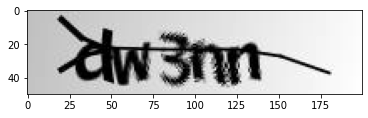

In [17]:
#Sample 1
img=cv2.imread('/content/drive/MyDrive/captcha_dataset/dw3nn.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [18]:
print("Predicted Captcha =",predict('/content/drive/MyDrive/captcha_dataset/dw3nn.png'))

1/1 [==============================] - 0s 187ms/step
Predicted Captcha = dw3nn
